# Regression on Country HELP dataset

* [Importing libraries and packages](#importing)
* [Set paths](#set-paths)
* [Loading data](#loading-data)
* [Merge mpi_urban and mpi_rural features of MPI dataset in world_data](#merge-regression)
* [Check correlations for DV](#corr)
* [Create linear regression object](#regression-object)
* [Check for multicollinearity and heteroskedasticity](#multicol-and-hetero)
* [Multivariate regression](#multivariate)
* [Regression conclusions](#conclusions-reg)

<a id="importing"></a>
## Importing libraries and packages

In [1]:
# Warnings
import warnings

# mathematical operations and data manipulation
import pandas as pd

# data visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# multivariate linear regression
from sklearn import linear_model

# geo data
import geopandas as gpd

# Residual plots
import statsmodels.api as sm
from statsmodels.formula.api import ols

warnings.filterwarnings("ignore")

/home/nina/anaconda3/envs/cv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/home/nina/anaconda3/envs/cv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


<a id="set-paths"></a>
## Set paths

In [2]:
# Path to datasets directory
data_path = "../datasets"
# Path to assets directory (for saving results to)
assets_path = "../assets"

<a id="loading-data"></a>
## Loading data

In [3]:
data_country = pd.read_csv(f"{data_path}/Country-data.csv")
# Shape of the dataset
print("Shape of the Country dataset: ", data_country.shape)
data_country.head()

Shape of the Country dataset:  (167, 10)


country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

In [4]:
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
# Shape of the dataset
print("Shape of the dataset: ", world.shape)
world.head()

Shape of the dataset:  (177, 6)


pop_est      continent                      name iso_a3  gdp_md_est  \
0     920938        Oceania                      Fiji    FJI      8374.0   
1   53950935         Africa                  Tanzania    TZA    150600.0   
2     603253         Africa                 W. Sahara    ESH       906.5   
3   35623680  North America                    Canada    CAN   1674000.0   
4  326625791  North America  United States of America    USA  18560000.0   

                                            geometry  
0  MULTIPOLYGON (((180.00000 -16.06713, 180.00000...  
1  POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...  
2  POLYGON ((-8.66559 27.65643, -8.66512 27.58948...  
3  MULTIPOLYGON (((-122.84000 49.00000, -122.9742...  
4  MULTIPOLYGON (((-122.84000 49.00000, -120.0000...

In [5]:
# MPI National dataset
data_world = pd.read_csv(f"{data_path}/MPI_national.csv")
print("Shape of the dataset: ", data_world.shape)
data_world.head()

Shape of the dataset:  (102, 8)


ISO     Country  MPI Urban  Headcount Ratio Urban  \
0  KAZ  Kazakhstan      0.000                    0.0   
1  SRB      Serbia      0.000                    0.1   
2  KGZ  Kyrgyzstan      0.000                    0.1   
3  TUN     Tunisia      0.000                    0.1   
4  ARM     Armenia      0.001                    0.2   

   Intensity of Deprivation Urban  MPI Rural  Headcount Ratio Rural  \
0                            33.3      0.000                   0.09   
1                            41.4      0.002                   0.50   
2                            40.2      0.003                   0.70   
3                            35.6      0.012                   3.18   
4                            33.3      0.001                   0.39   

   Intensity of Deprivation Rural  
0                            33.3  
1                            40.3  
2                            37.1  
3                            38.7  
4                            36.9

In [6]:
# MPI National dataset
world_data = pd.read_csv(f"{data_path}/world_data_gdf.csv")
print("Shape of the dataset: ", world_data.shape)
world_data.head()

Shape of the dataset:  (152, 16)


country  child_mort  exports  health  imports  income  inflation  \
0  Afghanistan        90.2     10.0    7.58     44.9    1610       9.44   
1      Albania        16.6     28.0    6.55     48.6    9930       4.49   
2      Algeria        27.3     38.4    4.17     31.4   12900      16.10   
3       Angola       119.0     62.3    2.85     42.9    5900      22.40   
4    Argentina        14.5     18.9    8.10     16.0   18700      20.90   

   life_expec  total_fer   gdpp  cluster   pop_est      continent iso_a3  \
0        56.2       5.82    553        1  34124811           Asia    AFG   
1        76.3       1.65   4090        0   3047987         Europe    ALB   
2        76.5       2.89   4460        0  40969443         Africa    DZA   
3        60.1       6.16   3530        1  29310273         Africa    AGO   
4        75.8       2.37  10300        0  44293293  South America    ARG   

   gdp_md_est                                           geometry  
0     64080.0  POLYGON ((66.51860680528867 37.36278432875879,...  
1     33900.0  POLYGON ((21.0200403174764 40.84272695572588, ...  
2    609400.0  POLYGON ((-8.684399786809053 27.39574412689601...  
3    189000.0  MULTIPOLYGON (((12.99551720546518 -4.781103203...  
4    879400.0  MULTIPOLYGON (((-68.63401022758323 -52.6363704...

<a id="merge-regression"></a>
## Merge mpi_urban and mpi_rural features of MPI dataset in world_data

The MPI dataset has no missing values or duplicates.

In [7]:
# Drop
data_world_dropped = data_world.drop(
    [
        "ISO",
        "Headcount Ratio Urban",
        "Intensity of Deprivation Urban",
        "Headcount Ratio Rural",
        "Intensity of Deprivation Rural",
    ],
    axis=1,
)

# Rename
data_world_dropped.rename(
    columns={
        "Country": "country",
        "MPI Urban": "mpi_urban",
        "MPI Rural": "mpi_rural",
    },
    inplace=True,
)

data_world_dropped.head()

country  mpi_urban  mpi_rural
0  Kazakhstan      0.000      0.000
1      Serbia      0.000      0.002
2  Kyrgyzstan      0.000      0.003
3     Tunisia      0.000      0.012
4     Armenia      0.001      0.001

In [8]:
data_world_dropped.to_csv(
    f"{data_path}/Country-data-world-dropped.csv", index=False
)

<AxesSubplot:title={'center':'MPI Urban'}, xlabel='mpi_urban', ylabel='Count'>

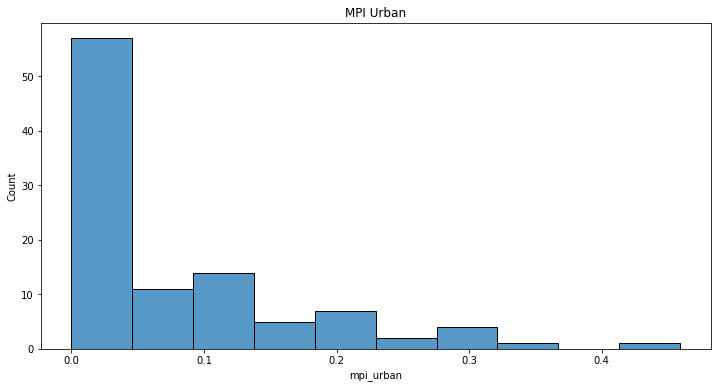

In [9]:
plt.figure(figsize=(12, 6))
plt.title("MPI Urban")
sns.histplot(data_world_dropped["mpi_urban"])

<AxesSubplot:title={'center':'MPI Rural'}, xlabel='mpi_rural', ylabel='Count'>

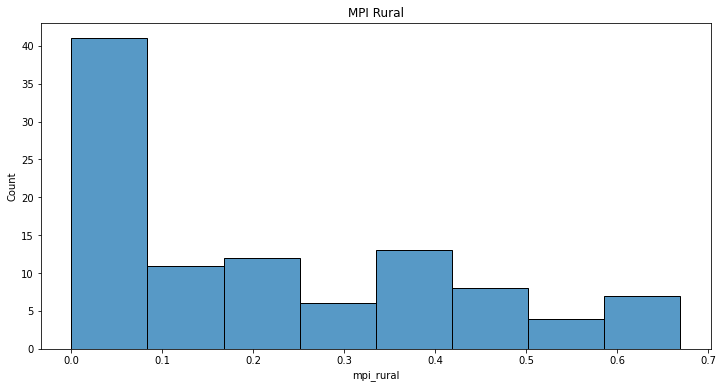

In [10]:
plt.figure(figsize=(12, 6))
plt.title("MPI Rural")
sns.histplot(data_world_dropped["mpi_rural"])

In [11]:
# Merge
merged = world_data.merge(data_world_dropped, on="country", how="inner")

# check
merged.head()

country  child_mort  exports  health  imports  income  inflation  \
0  Afghanistan        90.2     10.0    7.58     44.9    1610       9.44   
1      Albania        16.6     28.0    6.55     48.6    9930       4.49   
2      Algeria        27.3     38.4    4.17     31.4   12900      16.10   
3      Armenia        18.1     20.8    4.40     45.3    6700       7.77   
4   Azerbaijan        39.2     54.3    5.88     20.7   16000      13.80   

   life_expec  total_fer  gdpp  cluster   pop_est continent iso_a3  \
0        56.2       5.82   553        1  34124811      Asia    AFG   
1        76.3       1.65  4090        0   3047987    Europe    ALB   
2        76.5       2.89  4460        0  40969443    Africa    DZA   
3        73.3       1.69  3220        0   3045191      Asia    ARM   
4        69.1       1.92  5840        0   9961396      Asia    AZE   

   gdp_md_est                                           geometry  mpi_urban  \
0     64080.0  POLYGON ((66.51860680528867 37.36278432875879,...      0.132   
1     33900.0  POLYGON ((21.0200403174764 40.84272695572588, ...      0.003   
2    609400.0  POLYGON ((-8.684399786809053 27.39574412689601...      0.003   
3     26300.0  POLYGON ((46.50571984231797 38.77060537368629,...      0.001   
4    167900.0  MULTIPOLYGON (((46.40495079934882 41.860675157...      0.009   

   mpi_rural  
0      0.347  
1      0.007  
2      0.011  
3      0.001  
4      0.035

<a id="corr"></a>
## Check correlations for DV

<AxesSubplot:>

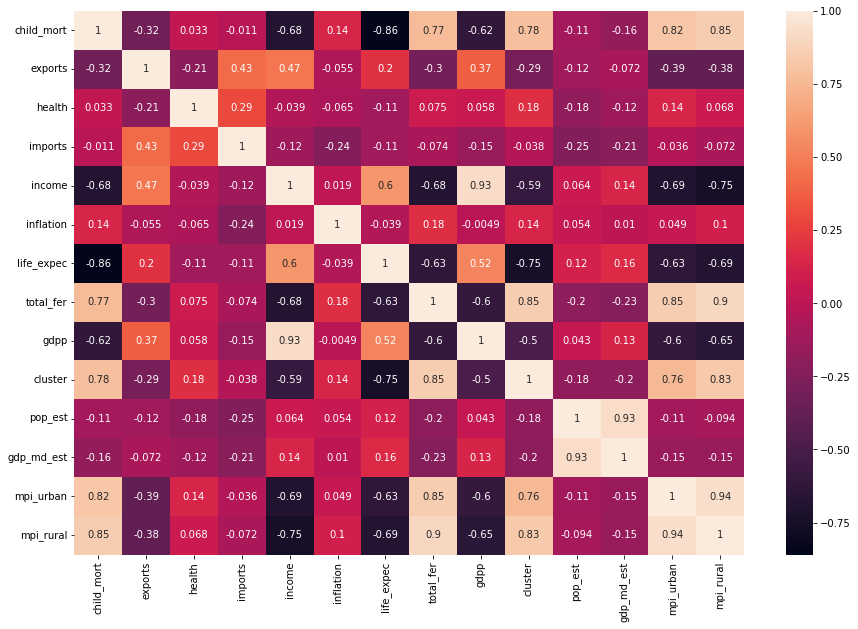

In [12]:
# Correlation: Pearson
plt.figure(figsize=(15, 10))
sns.heatmap(merged.corr(method="pearson", min_periods=1), annot=True)

* mpi_rural and mpi_urban have a high correlation
* Features having high correlation with mpi_urban are child_mort, income, life_expect, total_fer, and gdpp.
* child_mort has high correlations with features gdpp,riable total_fer, life_expec and income. When using child_mort as Dependent Variable (DV), we may have multicollinearity.


<a id="regression-object"></a>
## Create linear regression object

In [13]:
reg = linear_model.LinearRegression()

<a id="multicol-and-hetero"></a>
## Check for multicollinearity and heteroskedasticity

[Multicollinearity in Regression](https://statisticsbyjim.com/regression/multicollinearity-in-regression-analysis/) is a phenomenon in which one predictor variable in a multiple regression model can be linearly predicted from the others with a substantial degree of accuracy.
 Check "Partial Regression" and "CCPR" plots.

[Heteroskedasticity in Regression](https://statisticsbyjim.com/regression/heteroscedasticity-regression/) refers to a situation where the variance of the residuals is unequal over a range of measured values. Check "Residuals vs Feature" plots: Heteroscedasticity produces a distinctive fan or cone shape in residual plots.

In [14]:
# Create linear regression class object
reg = linear_model.LinearRegression()

                            OLS Regression Results                            
Dep. Variable:              mpi_urban   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.672
Method:                 Least Squares   F-statistic:                     157.0
Date:                Tue, 12 Apr 2022   Prob (F-statistic):           4.53e-20
Time:                        06:36:02   Log-Likelihood:                 123.04
No. Observations:                  77   AIC:                            -242.1
Df Residuals:                      75   BIC:                            -237.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0231      0.010     -2.307      0.0

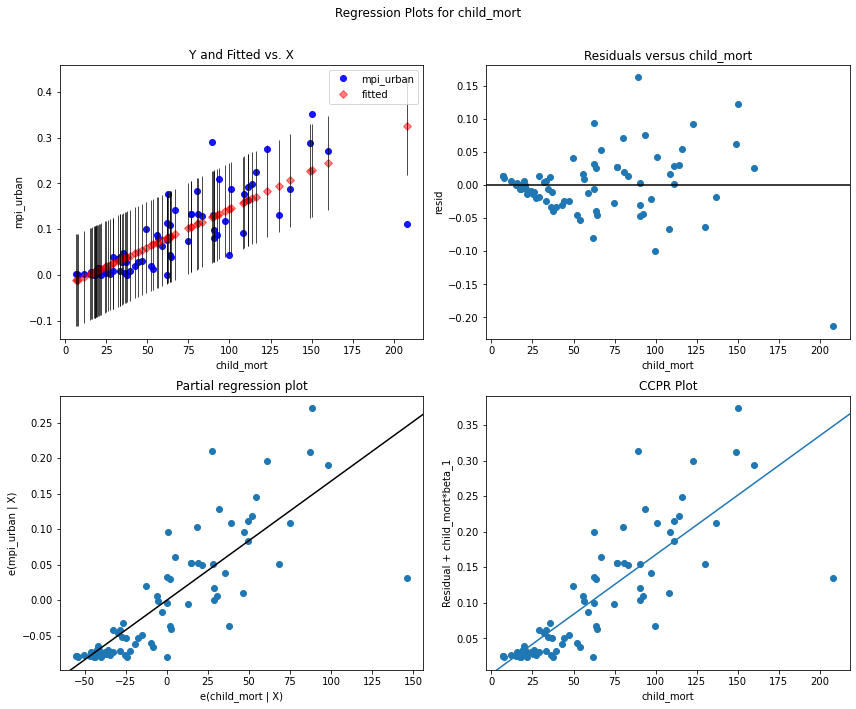

In [15]:
# Fit simple linear regression model
model = ols("mpi_urban ~ child_mort", data=merged).fit()

# Summary
print(model.summary())

# Plot
fig = plt.figure(figsize=(12, 10))
fig = sm.graphics.plot_regress_exog(model, "child_mort", fig=fig)

Maybe heteroscedasticity

                            OLS Regression Results                            
Dep. Variable:              mpi_urban   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.141
Method:                 Least Squares   F-statistic:                     13.48
Date:                Tue, 12 Apr 2022   Prob (F-statistic):           0.000450
Time:                        06:36:02   Log-Likelihood:                 85.927
No. Observations:                  77   AIC:                            -167.9
Df Residuals:                      75   BIC:                            -163.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1477      0.020      7.227      0.0

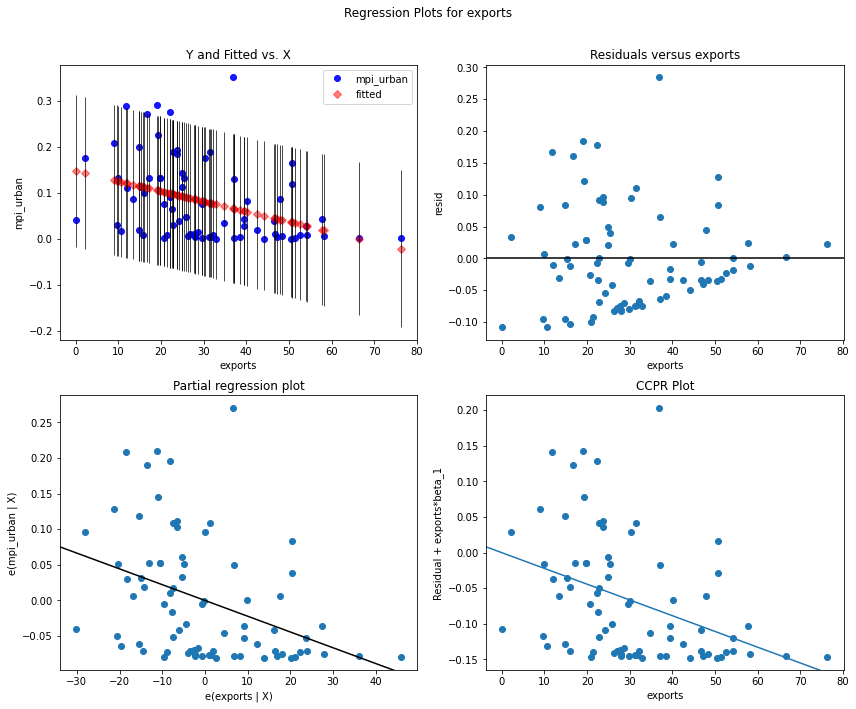

In [16]:
# Fit simple linear regression model
model = ols("mpi_urban ~ exports", data=merged).fit()

# Summary
print(model.summary())

# Plot
fig = plt.figure(figsize=(12, 10))
fig = sm.graphics.plot_regress_exog(model, "exports", fig=fig)

                            OLS Regression Results                            
Dep. Variable:              mpi_urban   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     1.514
Date:                Tue, 12 Apr 2022   Prob (F-statistic):              0.222
Time:                        06:36:03   Log-Likelihood:                 80.334
No. Observations:                  77   AIC:                            -156.7
Df Residuals:                      75   BIC:                            -152.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0481      0.028      1.708      0.0

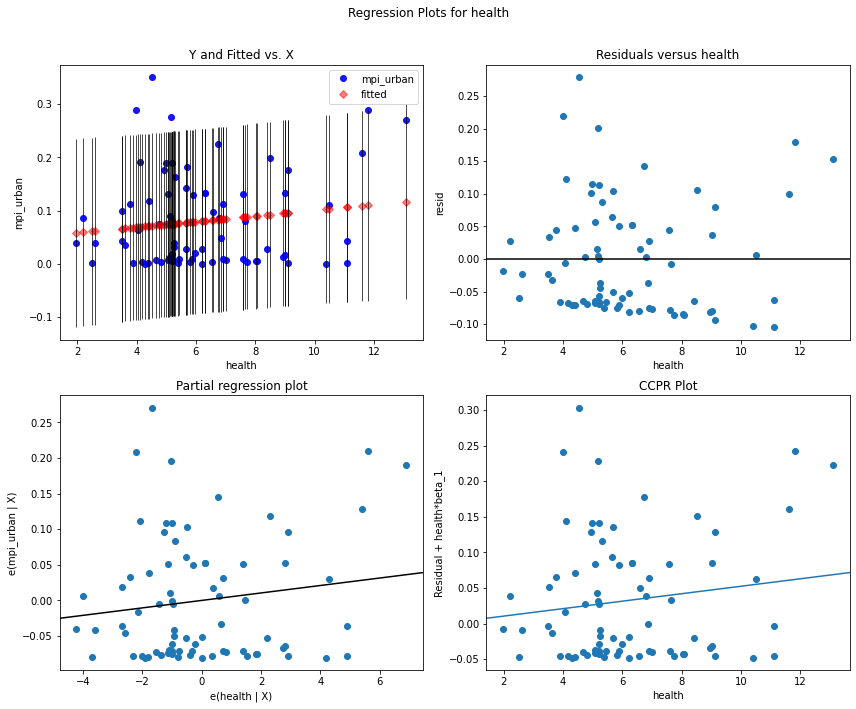

In [17]:
# Fit simple linear regression model
model = ols("mpi_urban ~ health", data=merged).fit()

# Summary
print(model.summary())

# Plot
fig = plt.figure(figsize=(12, 10))
fig = sm.graphics.plot_regress_exog(model, "health", fig=fig)

                            OLS Regression Results                            
Dep. Variable:              mpi_urban   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.012
Method:                 Least Squares   F-statistic:                   0.09843
Date:                Tue, 12 Apr 2022   Prob (F-statistic):              0.755
Time:                        06:36:03   Log-Likelihood:                 79.615
No. Observations:                  77   AIC:                            -155.2
Df Residuals:                      75   BIC:                            -150.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0878      0.025      3.525      0.0

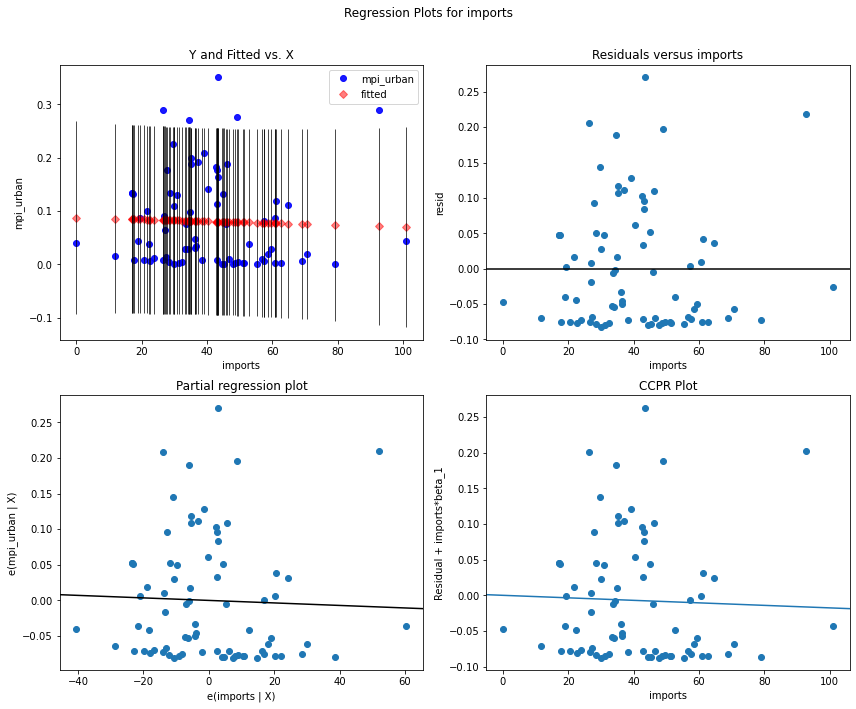

In [18]:
# Fit simple linear regression model
model = ols("mpi_urban ~ imports", data=merged).fit()

# Summary
print(model.summary())

# Plot
fig = plt.figure(figsize=(12, 10))
fig = sm.graphics.plot_regress_exog(model, "imports", fig=fig)

                            OLS Regression Results                            
Dep. Variable:              mpi_urban   R-squared:                       0.474
Model:                            OLS   Adj. R-squared:                  0.467
Method:                 Least Squares   F-statistic:                     67.72
Date:                Tue, 12 Apr 2022   Prob (F-statistic):           4.37e-12
Time:                        06:36:04   Log-Likelihood:                 104.33
No. Observations:                  77   AIC:                            -204.7
Df Residuals:                      75   BIC:                            -200.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1561      0.012     13.379      0.0

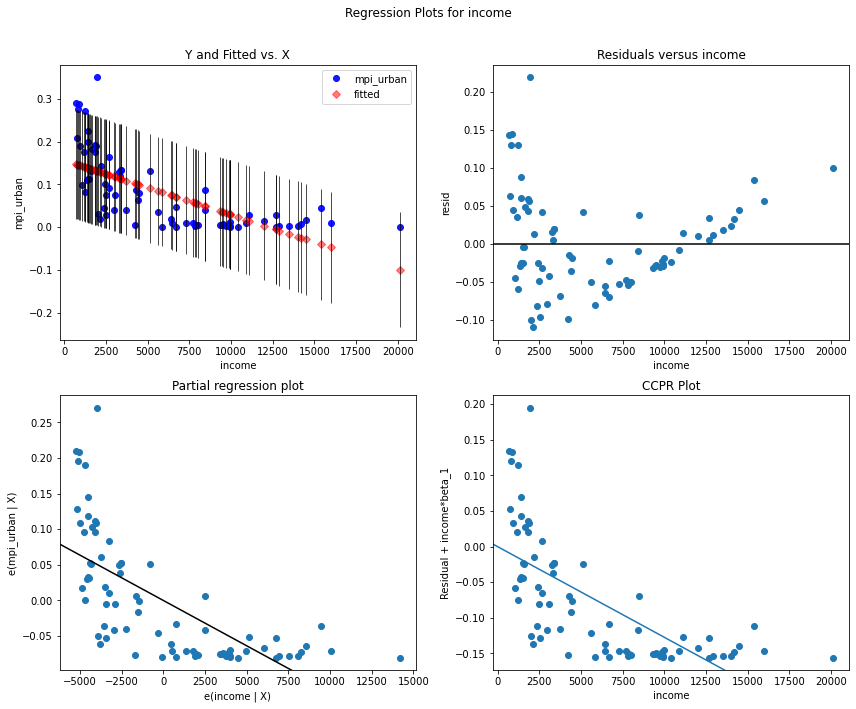

In [19]:
# Fit simple linear regression model
model = ols("mpi_urban ~ income", data=merged).fit()

# Summary
print(model.summary())

# Plot
fig = plt.figure(figsize=(12, 10))
fig = sm.graphics.plot_regress_exog(model, "income", fig=fig)

Multicollinearity and possible heteroscedasticity

                            OLS Regression Results                            
Dep. Variable:              mpi_urban   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.011
Method:                 Least Squares   F-statistic:                    0.1826
Date:                Tue, 12 Apr 2022   Prob (F-statistic):              0.670
Time:                        06:36:04   Log-Likelihood:                 79.658
No. Observations:                  77   AIC:                            -155.3
Df Residuals:                      75   BIC:                            -150.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0773      0.013      6.124      0.0

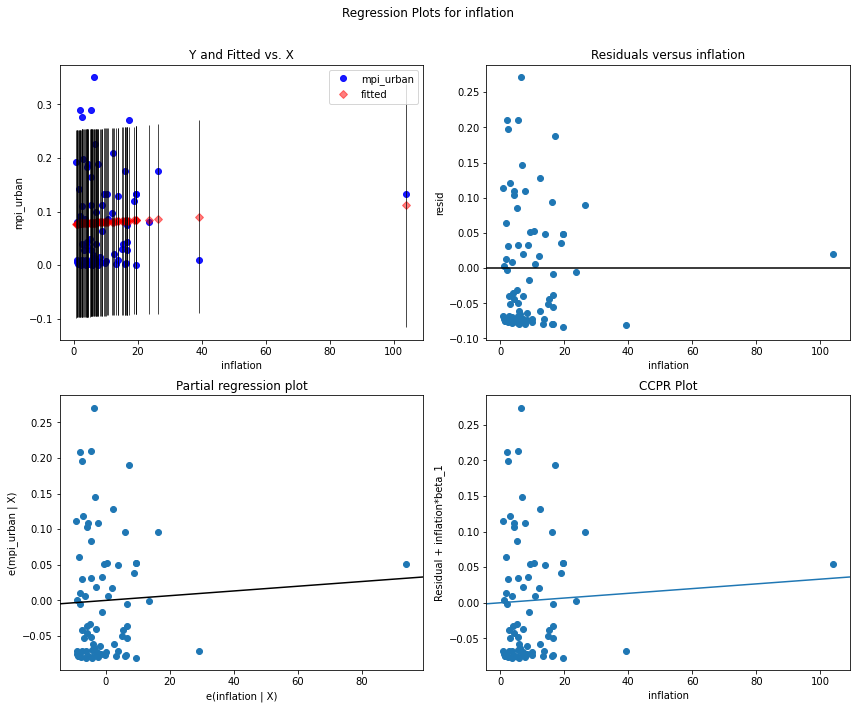

In [20]:
# Fit simple linear regression model
model = ols("mpi_urban ~ inflation", data=merged).fit()

# Summary
print(model.summary())

# Plot
fig = plt.figure(figsize=(12, 10))
fig = sm.graphics.plot_regress_exog(model, "inflation", fig=fig)

                            OLS Regression Results                            
Dep. Variable:              mpi_urban   R-squared:                       0.401
Model:                            OLS   Adj. R-squared:                  0.393
Method:                 Least Squares   F-statistic:                     50.28
Date:                Tue, 12 Apr 2022   Prob (F-statistic):           6.28e-10
Time:                        06:36:05   Log-Likelihood:                 99.316
No. Observations:                  77   AIC:                            -194.6
Df Residuals:                      75   BIC:                            -189.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4973      0.059      8.390      0.0

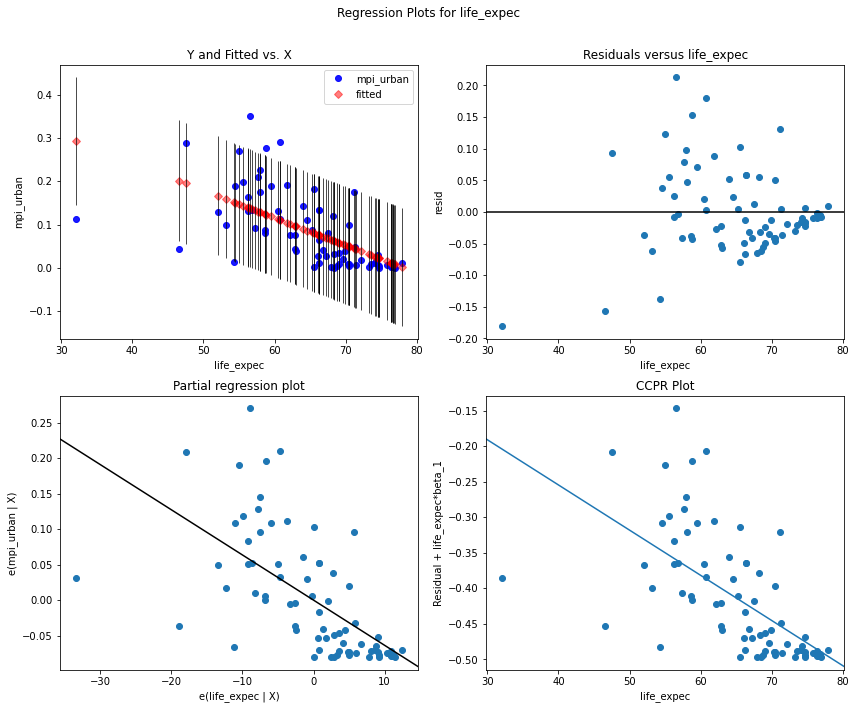

In [21]:
# Fit simple linear regression model
model = ols("mpi_urban ~ life_expec", data=merged).fit()

# Summary
print(model.summary())

# Plot
fig = plt.figure(figsize=(12, 10))
fig = sm.graphics.plot_regress_exog(model, "life_expec", fig=fig)

Possible heteroscedasticity

                            OLS Regression Results                            
Dep. Variable:              mpi_urban   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     201.5
Date:                Tue, 12 Apr 2022   Prob (F-statistic):           6.02e-23
Time:                        06:36:05   Log-Likelihood:                 129.80
No. Observations:                  77   AIC:                            -255.6
Df Residuals:                      75   BIC:                            -250.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0958      0.013     -7.116      0.0

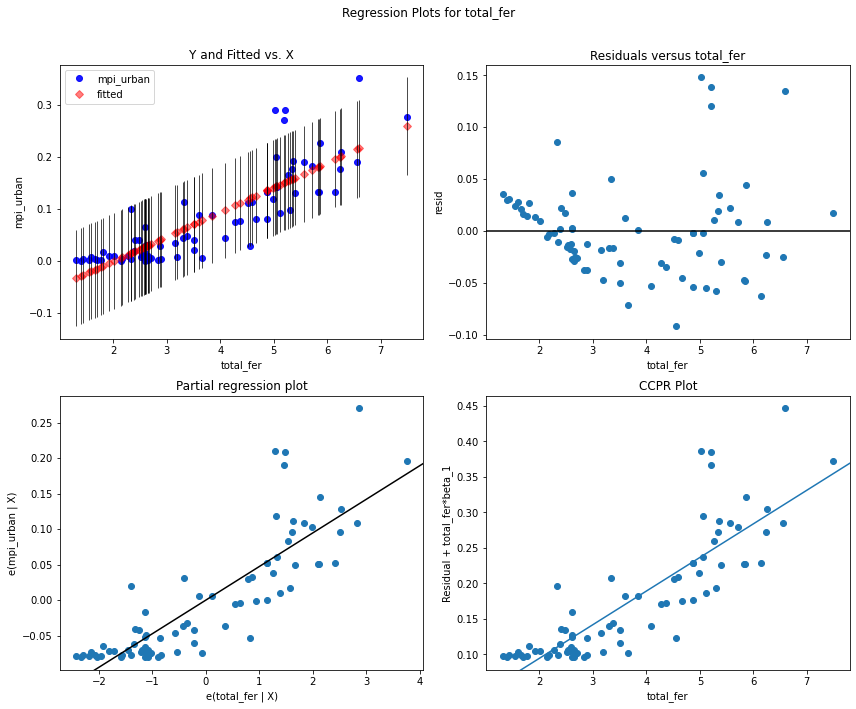

In [22]:
# Fit simple linear regression model
model = ols("mpi_urban ~ total_fer", data=merged).fit()

# Summary
print(model.summary())

# Plot
fig = plt.figure(figsize=(12, 10))
fig = sm.graphics.plot_regress_exog(model, "total_fer", fig=fig)

Possible heteroscedasticity

                            OLS Regression Results                            
Dep. Variable:              mpi_urban   R-squared:                       0.360
Model:                            OLS   Adj. R-squared:                  0.352
Method:                 Least Squares   F-statistic:                     42.21
Date:                Tue, 12 Apr 2022   Prob (F-statistic):           8.01e-09
Time:                        06:36:06   Log-Likelihood:                 96.754
No. Observations:                  77   AIC:                            -189.5
Df Residuals:                      75   BIC:                            -184.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1387      0.012     11.588      0.0

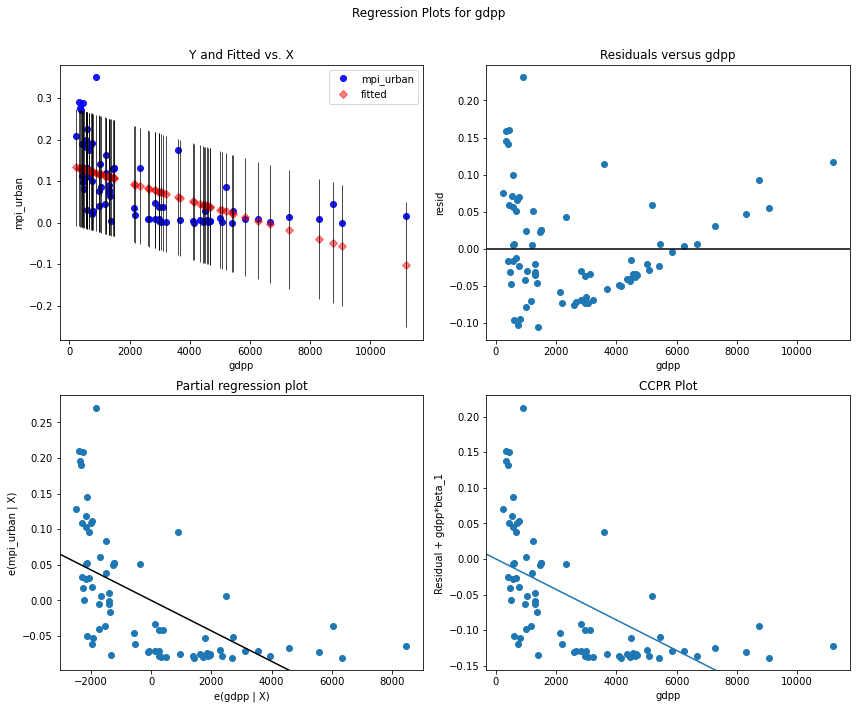

In [23]:
# Fit simple linear regression model
model = ols("mpi_urban ~ gdpp", data=merged).fit()

# Summary
print(model.summary())

# Plot
fig = plt.figure(figsize=(12, 10))
fig = sm.graphics.plot_regress_exog(model, "gdpp", fig=fig)

Multicollinearity and possible heteroscedasticity

<a id="multivariate"></a>
## Multivariate regression

In [24]:
# Train model with all features
reg.fit(
    merged[
        [
            "child_mort",
            "exports",
            "health",
            "imports",
            "income",
            "inflation",
            "life_expec",
            "total_fer",
            "gdpp",
        ]
    ],
    merged.mpi_urban,
)

LinearRegression()

[Accuracy assessment with adjusted R-squared](https://statisticsbyjim.com/regression/interpret-adjusted-r-squared-predicted-r-squared-regression/)

In [25]:
1 - (
    1
    - reg.score(
        merged[
            [
                "child_mort",
                "exports",
                "health",
                "imports",
                "income",
                "inflation",
                "life_expec",
                "total_fer",
                "gdpp",
            ]
        ],
        merged.mpi_urban,
    )
) * (len(merged.mpi_urban) - 1) / (
    len(merged.mpi_urban)
    - merged[
        [
            "child_mort",
            "exports",
            "health",
            "imports",
            "income",
            "inflation",
            "life_expec",
            "total_fer",
            "gdpp",
        ]
    ].shape[1]
    - 1
)

0.819005448971585

In [26]:
# Train model without features with multicollinearity and heteroscedasticity
reg.fit(
    merged[["exports", "health", "imports", "inflation", "gdpp"]],
    merged.mpi_urban,
)

# Adjusted R-squared
1 - (
    1
    - reg.score(
        merged[["exports", "health", "imports", "inflation", "gdpp"]],
        merged.mpi_urban,
    )
) * (len(merged.mpi_urban) - 1) / (
    len(merged.mpi_urban)
    - merged[["exports", "health", "imports", "inflation", "gdpp"]].shape[1]
    - 1
)

0.3864747976737123

In [27]:
# Train model features with highest R-squared value found on linear regression
reg.fit(merged[["child_mort", "total_fer"]], merged.mpi_urban)

# Adjusted R-squared
1 - (1 - reg.score(merged[["child_mort", "total_fer"]], merged.mpi_urban)) * (
    len(merged.mpi_urban) - 1
) / (len(merged.mpi_urban) - merged[["child_mort", "total_fer"]].shape[1] - 1)

0.7903299252946984

<a id="conclusions-reg"></a>
## Regression conclusions

* With all features of the original dataset, the adjusted R-squared value is >80%, considered a good result, and we need to consider that there are features in it which show multicolliearity and heteroscedasticity. The model may not have been well-fitted.
* Without features with multicollinearity and heteroscedasticity, the adjusted R-squared value significantly decreases to 39%.
* With features with highest R-squared value found earlier, the adjusted R-squared value is 79%. Based on initial correlation analysis of these features, these have high positive correlation.